# Midterm Web Scrapping - Day of the Dead
#### Mt SAC CISB 63 Midterm Project Fall 2023
#### Alexander Alvarez

# Introduction

## In this project the text will be extracted using beatiful soup and some Natural Language Processing techniques will be used.

In [2]:
import requests # to get the html source code of the page
from bs4 import BeautifulSoup # to parse the html source code
import re # to use regular expressions
from nltk.corpus import stopwords # to remove stopwords
from nltk.stem import PorterStemmer # to stem words to their root form (Example: running -> run)
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Download nltk data

In [3]:
# Preprocess the text (remove punctuation and stopwords)
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alexalvarez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alexalvarez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Fetch and Parse HTML

In [4]:
url = "https://en.wikipedia.org/wiki/Day_of_the_Dead"
response = requests.get(url)
html_content = response.content
soup = BeautifulSoup(html_content, 'html.parser')

# Extract the data

In [5]:
# Example: Extracting all paragraphs
paragraphs = soup.find_all('p')
# Extracting text from each paragraph
paragraph_texts = [paragraph.get_text() for paragraph in paragraphs]

# Text processing

In [6]:
# Convert to lowercase
lowercase_text = [text.lower() for text in paragraph_texts]

# Remove special characters using regex
cleaned_text = [re.sub(r'[^a-zA-Z0-9\s]', '', text) for text in lowercase_text]

# Tokenization
tokenized_text = [word_tokenize(text) for text in cleaned_text]

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_text = [[word for word in tokens if word not in stop_words] for tokens in tokenized_text]

# Stemming
stemmer = PorterStemmer()
stemmed_text = [[stemmer.stem(word) for word in tokens] for tokens in filtered_text]

In [7]:
# Remove empty tokens
final_text = [[word for word in tokens if word.strip()] for tokens in stemmed_text]
# final_text = [[word for word in tokens if word.strip()] for tokens in filtered_text]

# Convert tokens back to sentences
sentences = [' '.join(tokens) for tokens in final_text]

In [8]:
# Convert sentences back to paragraphs
processed_paragraphs = '\n\n'.join(sentences)

### Save the Propcess

In [9]:
with open('processed_text.txt', 'w', encoding='utf-8') as file:
    file.write(processed_paragraphs)
    
print(processed_paragraphs)



day dead spanish el da de muerto el da de lo muertos23 holiday tradit celebr novemb 1 2 though day octob 31 novemb 6 may includ depend locality456 wide observ mexico larg develop also observ place especi peopl mexican heritag although relat simultan christian remembr hallowtide1 much less solemn tone portray holiday joy celebr rather mourning7 argu indigen mexican ancient aztec influenc account custom becom way rememb forebear mexican cultur multiday holiday involv famili friend gather pay respect rememb friend famili member die celebr take humor tone celebr rememb funni event anecdot departed8

tradit connect holiday includ honor deceas use calavera marigold flower known cempazchitl build home altar call ofrenda favorit food beverag depart visit grave item gift deceased9 celebr sole focus dead also common give gift friend candi sugar skull share tradit pan de muerto famili friend write lightheart often irrever vers form mock epitaph dedic live friend acquaint literari form known cal

In [9]:
# Split the text into sentences keeping the original format
original_sentences = processed_paragraphs.strip().split('.')

# Now 'original_sentences' is an array of text
print(original_sentences)

['day dead spanish el da de muerto el da de lo muertos23 holiday tradit celebr novemb 1 2 though day octob 31 novemb 6 may includ depend locality456 wide observ mexico larg develop also observ place especi peopl mexican heritag although relat simultan christian remembr hallowtide1 much less solemn tone portray holiday joy celebr rather mourning7 argu indigen mexican ancient aztec influenc account custom becom way rememb forebear mexican cultur multiday holiday involv famili friend gather pay respect rememb friend famili member die celebr take humor tone celebr rememb funni event anecdot departed8\n\ntradit connect holiday includ honor deceas use calavera marigold flower known cempazchitl build home altar call ofrenda favorit food beverag depart visit grave item gift deceased9 celebr sole focus dead also common give gift friend candi sugar skull share tradit pan de muerto famili friend write lightheart often irrever vers form mock epitaph dedic live friend acquaint literari form known c

In [10]:
len(sentences)

61

In [11]:
def preprocess_text(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalnum()]
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

In [12]:
#cleaned_sentence = re.sub(r'[^a-zA-Z]', ' ', sentence)

def preprocess_text(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Replace non-alphabetical characters with spaces using regular expression
    cleaned_sentence = re.sub(r'[^a-zA-Z]', ' ', text)
    # Tokenize the cleaned sentence into words
    cleaned_words = word_tokenize(cleaned_sentence)

    # Convert words to lowercase, filter out non-alphabetical characters, and remove stop words
    cleaned_words = [word.lower() for word in cleaned_words if word.isalnum() and word not in stop_words]

    # Join the cleaned words back into a single string
    return ' '.join(cleaned_words)

In [13]:
preprocessed_sentences = []
for sentence in sentences:
    preprocessed_sentence = preprocess_text(sentence)
    preprocessed_sentences.append(preprocessed_sentence)

In [14]:
print(sentences)

['', 'day dead spanish el da de muerto el da de lo muertos23 holiday tradit celebr novemb 1 2 though day octob 31 novemb 6 may includ depend locality456 wide observ mexico larg develop also observ place especi peopl mexican heritag although relat simultan christian remembr hallowtide1 much less solemn tone portray holiday joy celebr rather mourning7 argu indigen mexican ancient aztec influenc account custom becom way rememb forebear mexican cultur multiday holiday involv famili friend gather pay respect rememb friend famili member die celebr take humor tone celebr rememb funni event anecdot departed8', 'tradit connect holiday includ honor deceas use calavera marigold flower known cempazchitl build home altar call ofrenda favorit food beverag depart visit grave item gift deceased9 celebr sole focus dead also common give gift friend candi sugar skull share tradit pan de muerto famili friend write lightheart often irrever vers form mock epitaph dedic live friend acquaint literari form kno

# EDA

In [33]:
#convert the list of word to a dataframe.
df = pd.DataFrame(filtered_text)

In [34]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,150,151,152,153
0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,day,dead,spanish,el,da,de,muertos,el,da,de,...,None,None,None,None,None,None,None,None,None,None
2,traditions,connected,holiday,include,honoring,deceased,using,calaveras,marigold,flowers,...,None,None,None,None,None,None,None,None,None,None
3,2008,tradition,inscribed,representative,list,intangible,cultural,heritage,humanity,unesco11,...,None,None,None,None,None,None,None,None,None,None
4,mexican,academics,divided,whether,festivity,genuine,indigenous,prehispanic,roots,whether,...,None,None,None,None,None,None,None,None,None,None


<Axes: >

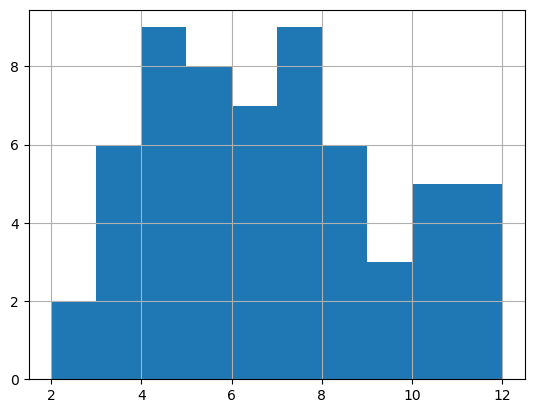

In [36]:
#length of each word in column 0
df[0].str.len().hist()

In [40]:
#Change the none to empty string
df = df.fillna("")

In [43]:
#getting the unique words from column 1
df[1].unique()

array(['', 'dead', 'connected', 'tradition', 'academics', 'differ',
       'sanchez', 'ricardo', 'day', 'key', 'views', 'c', 'devoted',
       'notes', 'origin', 'mexico', 'de', 'brought', 'build', 'food',
       'peninsula', 'symbol', 'country', 'literary', 'famous', 'image',
       'character', 'presentations', 'activities', 'town', 'peculiar',
       'james', 'us', 'also', 'institution', 'bidenharris', 'ana',
       'interactions', 'traditional', 'diego', 'november', 'families',
       'sicilian', 'plays', 'visiting', 'close', 'promotion', 'public',
       'rica', 'celebrations', 'peruvians', 'biscottitype'], dtype=object)

# Applying NLP Tecniques

In [20]:
# Calculate TF-IDF scores
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(sentences)
tfidf_scores = tfidf_matrix.sum(axis=1)

In [21]:
# Find the most important sentences based on TF-IDF scores
top_sentence_indices = np.argsort(tfidf_scores, axis=0)[-7:]

In [22]:
top_sentence_indices

matrix([[38],
        [ 6],
        [27],
        [57],
        [45],
        [ 5],
        [47]])

In [23]:
sentences[5]

'view differ whether festiv indigen prehispan root whether modern adapt exist european tradit combin manifest syncret similar tradit trace back mediev europ celebr like saint day soul day observ day place like spain southern europ critic nativ american origin claim even though precolumbian mexico tradit honor dead current depict festiv common european tradit dans macabr allegori life death personifi human skeleton remind us ephemer natur life1612 past decad howev mexican academia increasingli question valid assumpt even go far call polit motiv fabric historian elsa malvido research mexican inah founder institut taller de estudio sobr la muert first context wider research mexican attitud death diseas across centuri malvido complet discard nativ even syncret origin argu tradit fulli trace mediev europ highlight exist similar tradit day spain rest cathol southern europ latin america altar dead sweet shape skull bread shape bones16'

In [24]:
top_sentences = []

for index in range(len(top_sentence_indices)):
    val = sentences[index]
    #print(index, val)
    #top_sentences.append(sentences[index])

    # Join the top sentences to create the summary
    summary = ''.join(val) +  '.'

    print(summary)

.
day dead spanish el da de muerto el da de lo muertos23 holiday tradit celebr novemb 1 2 though day octob 31 novemb 6 may includ depend locality456 wide observ mexico larg develop also observ place especi peopl mexican heritag although relat simultan christian remembr hallowtide1 much less solemn tone portray holiday joy celebr rather mourning7 argu indigen mexican ancient aztec influenc account custom becom way rememb forebear mexican cultur multiday holiday involv famili friend gather pay respect rememb friend famili member die celebr take humor tone celebr rememb funni event anecdot departed8.
tradit connect holiday includ honor deceas use calavera marigold flower known cempazchitl build home altar call ofrenda favorit food beverag depart visit grave item gift deceased9 celebr sole focus dead also common give gift friend candi sugar skull share tradit pan de muerto famili friend write lightheart often irrever vers form mock epitaph dedic live friend acquaint literari form known cal

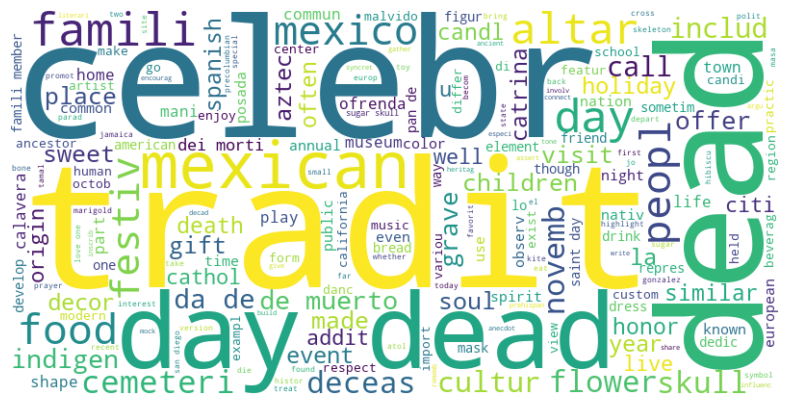

In [25]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(processed_paragraphs)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [26]:
from textblob import TextBlob

In [27]:
# Create a TextBlob object with the text
blob = TextBlob(processed_paragraphs)

# Translate the text to Spanish
translated_blob = blob.translate('en', 'es')

# Print the translated text
print(translated_blob)

día muerto español el da de muerto el da de lo muertos23 Tradit de vacaciones celebrando noviembre 1 2 Día de octubre de octubre 31 de noviembre 6 puede incluir dependencia de la localidad 456 de ancho de ancho México Larg Desarrollar también Observar Especial retratando la alegría festiva celebrar más bien duelo7 argumio indigen mexicano antiguo aztec cuentas de influencia costumbres al recuerdo de la cultura mexicana multiplicada de la fiesta de las vacaciones familiares recolección de respeto respeto a un amigo familiar die fechan celebrando el tono de humor celebrando el evento funni evento anécdot 8

Tradit Connect Holiday incluyendo honor decés use calavera marigold flor conocida cempazchitl construir altar en el hogar Formulario Mock Epitaph Dedic Live Friend Conocer literario conocido Calavera Literarias10

2008 Tradit Inscrib Represent Represent intang Cultur Heritag Human UNESCO11

Divid de la academia mexicana si Festiv Genuin Indigen Prehispan Root si 20th Centuri vuelve a 

# Conclusion

## In this project some Natural Language Processing techniques were incorporated in which the word where tokenizer, and also only the stem was used using the Stemmer. Also after the processing with these techniques a summary of the text scraped was summarize. A word Cloud was also created. 